In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import corner
import os

In [2]:
os.getcwd()

'/home/sachins/work/LIGO_India/dL_iota_degeneracy_sims/LV/post_samples'

In [6]:
sims = np.arange(200, 6200, 100)
# sims = np.array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
#        1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
#        2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400,
#        3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500,
#        4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600,
#        5700, 5800, 5900, 6000, 6100])
mchirp_true = 1.4847507357166811
mchirp = []
dL = []
iota = []
psi = []
idx = []

for i in sims:
    
    file = h5py.File('post_samples_interp_L1V1_{}.hdf'.format(i), 'r')
    temp = np.array(file['Mc'])
    
    if(mchirp_true >= np.quantile(temp, q=[0.05]) and mchirp_true <= np.quantile(temp, q=[0.95])):
        
        mchirp.append(list(np.array(file['Mc'])))
        dL.append(list(np.array(file['dL'])))
        iota.append(list(np.array(file['iota'])))
        psi.append(list(np.array(file['pol'])))
        idx.append(i)
        
    file.close()
    
# with h5py.File('LV_sims_samples.hdf', 'a') as f:
    
#     f.create_dataset('sim_id', data=np.array(idx))
#     f.create_dataset('dL', data=np.array(dL))
#     f.create_dataset('iota', data=np.array(iota))
    

In [49]:
# idx

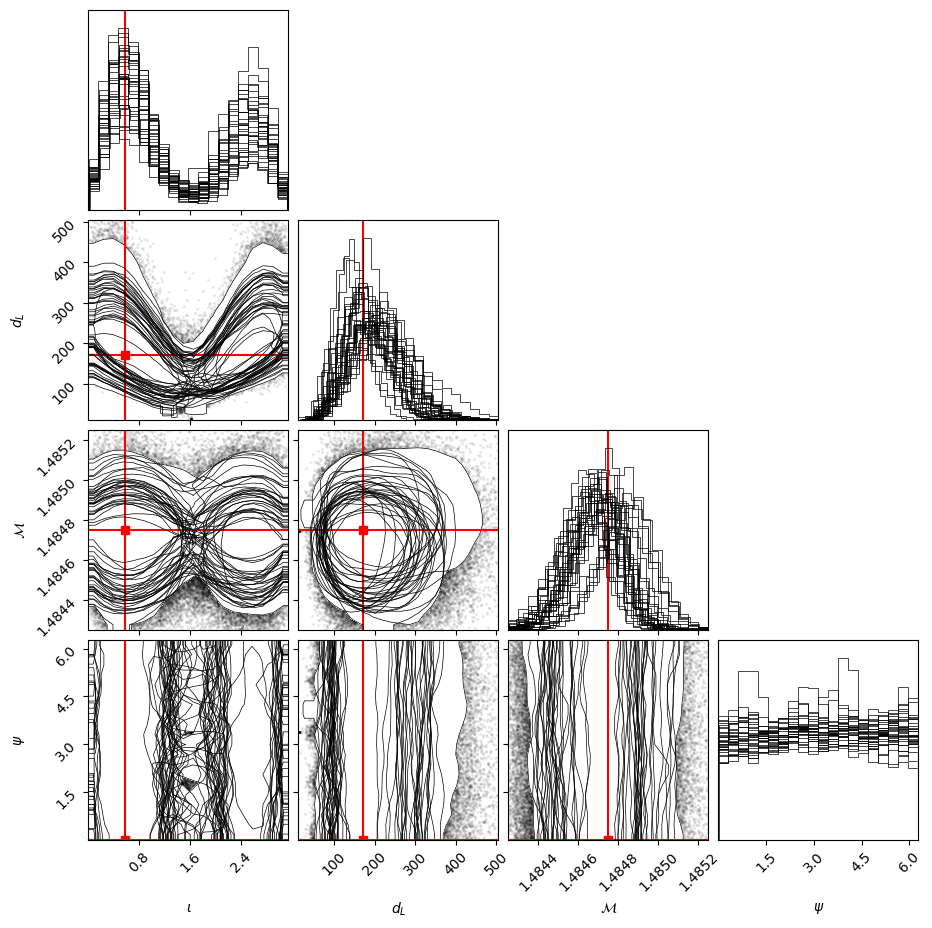

In [8]:
labels = [r'$\iota$', r'$d_L$', r'$\mathcal{M}$', r'$\psi$']

fig = corner.corner(np.column_stack((iota[0], dL[0], mchirp[0], psi[0])), labels=labels, labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), \
                    plot_density=False, contour_kwargs=dict(linewidths=0.5), smooth=0.9, truths=[0.583, 170.99, mchirp_true, 0], truth_color='r')

for i in range(1, len(iota)-1):
    
    corner.corner(np.column_stack((iota[i], dL[i], mchirp[i], psi[i])), labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), \
                  plot_density=False, contour_kwargs=dict(linewidths=0.5), smooth=0.9, fig=fig)

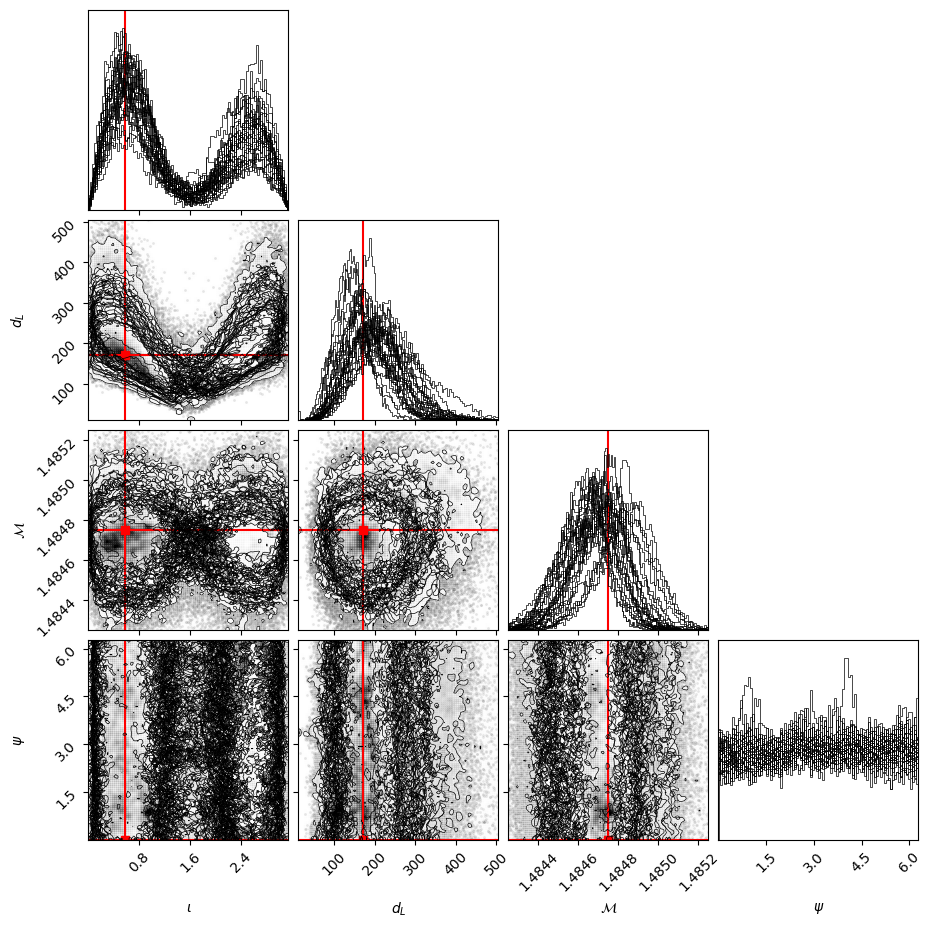

In [12]:
idx_common = [300, 400, 500, 600, 700, 800, 1100, 1200, 1800, 1900, 2100, 2200, 2300, 2400, 2700, 2800, 3100, 3300, 3500, \
 3700, 3900, 4100, 4900, 5000, 5300, 5600, 5700, 5900]

mchirp_true = 1.4847507357166811
mchirp = []
dL = []
iota = []
psi = []
# mchirp = np.zeros(len(idx_common))
# dL = np.zeros(len(idx_common))
# iota = np.zeros(len(idx_common))

j = 0

for i in idx_common:
    
    file = h5py.File('post_samples_interp_L1V1_{}.hdf'.format(i), 'r')
#     temp = np.array(file['Mc'])
    
#     if(mchirp_true >= np.quantile(temp, q=[0.05]) and mchirp_true <= np.quantile(temp, q=[0.95])):
        
#     mchirp[j] = np.array(file['Mc'])
#     dL[j] = np.array(file['dL'])
#     iota[j] = np.array(file['iota'])
    
    mchirp.append(list(np.array(file['Mc'])))
    dL.append(list(np.array(file['dL'])))
    iota.append(list(np.array(file['iota'])))
    psi.append(list(np.array(file['pol'])))
    # j = j + 1
    file.close()

labels = [r'$\iota$', r'$d_L$', r'$\mathcal{M}$', r'$\psi$']

bins = 100

fig = corner.corner(np.column_stack((iota[0], dL[0], mchirp[0], psi[0])), bins=bins, labels=labels, labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), \
                    plot_density=True, contour_kwargs=dict(linewidths=0.5), smooth=0.9, truths=[0.583, 170.99, mchirp_true, 0], truth_color='r')

for i in range(1, 28):
    
    corner.corner(np.column_stack((iota[i], dL[i], mchirp[i], psi[i])), bins=bins, labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), \
                  plot_density=True, contour_kwargs=dict(linewidths=0.5), smooth=0.9, fig=fig)


In [134]:
iota_big_LV = np.empty([])

for i in range(len(idx_common)):
    
    iota_big_LV = np.append(iota_big_LV, iota[i])
    
dL_big_LV = np.empty([])

for i in range(len(idx_common)):
    
    dL_big_LV = np.append(dL_big_LV, dL[i])
    

In [152]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')
from pesummary.utils.utils import logger
import logging
logger.setLevel(logging.CRITICAL)

1.0.0


In [175]:
# temp['LV'] = dict(iota = iota[0], dL = dL[0])

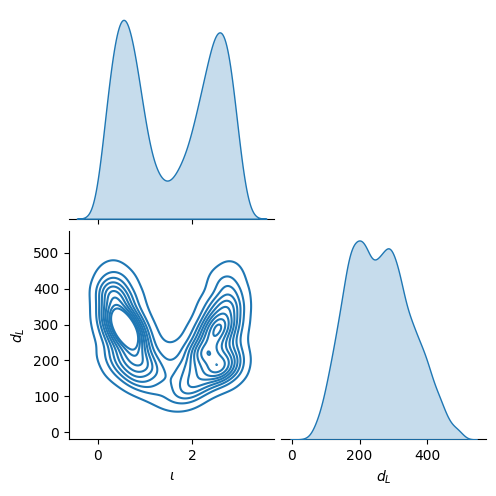

In [151]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.column_stack((iota[0], dL[0])), columns=[r'$\iota$', r'$d_L$'])
sns.pairplot(df, kind='kde', corner=True)

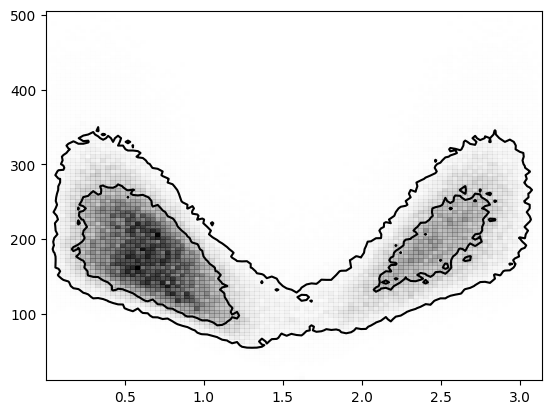

In [150]:
corner.hist2d(iota_big_LV[1:], dL_big_LV[1:], bins=100, levels=[0.5, 0.9], \
              fill_contours=False, plot_datapoints=False)

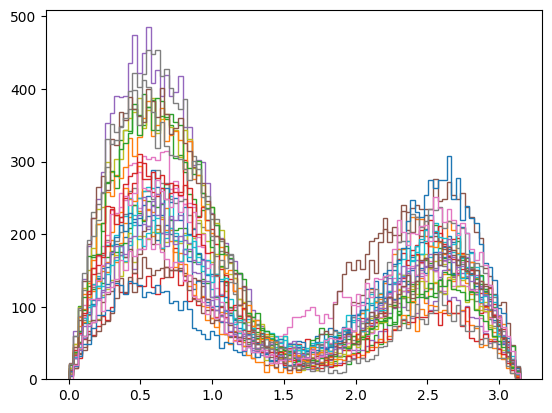

In [125]:
bins = np.linspace(0, np.pi, 100)
counts = np.zeros((100, len(idx_common)))
numbs = np.zeros(100)

for i in range(len(idx_common)):

    cnt, _, _ = plt.hist(iota[i], bins=bins, histtype='step')
    counts[1:,i] = cnt
    numbs[1:] += cnt
    
numbs = np.ceil(numbs/len(idx_common))

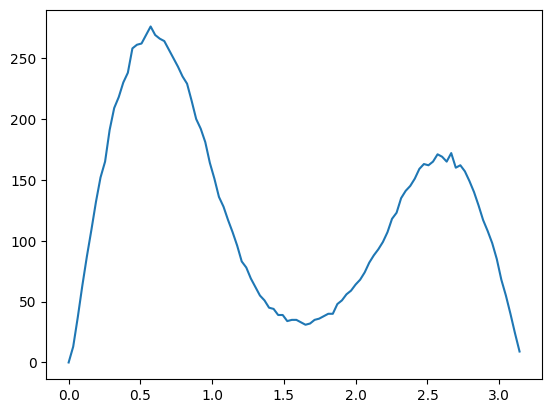

In [130]:
plt.plot(bins, numbs)

In [132]:
numbs

array([  0.,  13.,  37.,  63.,  87., 109., 132., 152., 165., 191., 209.,
       218., 230., 238., 258., 261., 262., 269., 276., 269., 266., 264.,
       257., 250., 243., 235., 229., 215., 200., 192., 181., 164., 151.,
       136., 128., 117., 107.,  96.,  83.,  78.,  69.,  62.,  55.,  51.,
        45.,  44.,  39.,  39.,  34.,  35.,  35.,  33.,  31.,  32.,  35.,
        36.,  38.,  40.,  40.,  48.,  51.,  56.,  59.,  64.,  68.,  74.,
        82.,  88.,  93.,  99., 107., 118., 123., 135., 141., 145., 151.,
       159., 163., 162., 165., 171., 169., 165., 172., 160., 162., 157.,
       149., 140., 129., 117., 108.,  98.,  85.,  68.,  55.,  40.,  24.,
         9.])

In [176]:
from pesummary.core.plots.publication import triangle_plot

In [177]:
triangle_plot

<function pesummary.core.plots.publication.triangle_plot(*args, **kwargs)>

In [178]:
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict as Dict

In [184]:
help(Dict)

Help on class MultiAnalysisSamplesDict in module pesummary.utils.samples_dict:

class MultiAnalysisSamplesDict(_MultiDimensionalSamplesDict)
 |  MultiAnalysisSamplesDict(*args, labels=None, transpose=False)
 |  
 |  Class to samples from multiple analyses
 |  
 |  Parameters
 |  ----------
 |  parameters: list
 |      list of parameters
 |  samples: nd list
 |      list of samples for each parameter for each chain
 |  labels: list, optional
 |      the labels to use to distinguish different analyses.
 |  transpose: Bool, optional
 |      True if the input is a transposed dictionary
 |  
 |  Attributes
 |  ----------
 |  T: pesummary.utils.samples_dict.MultiAnalysisSamplesDict
 |      Transposed MultiAnalysisSamplesDict object keyed by parameters
 |      rather than label
 |  nsamples: int
 |      Total number of analyses stored in the MultiAnalysisSamplesDict
 |      object
 |  number_of_samples: dict
 |      Number of samples stored in the MultiAnalysisSamplesDict for each
 |      ana